# Predicting galaxy redshift from band magnitudes with XGBoost

Zooey Nguyen

2021-07-01

- 2021-07-06: Update with photoz_utils

- 2021-07-08: Update with density estimation

- 2021-07-16: Update with photoz_metrics and v3 crossmatched data

- 2021-07-20: Update with new photoz_metrics metrics outputs

- 2021-07-27: Update with photoz_utils scaling

In [1]:
from photoz_utils import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Setup data

In [6]:
df = import_photoz_data('/data/HSC/HSC_v3/all_specz_flag_forced_forced2_spec_z_matched_online.csv')
df = clean_photoz_data(df, errors=False, filters=[1,2], scaled=True)

In [9]:
X_train, X_test, y_train, y_test = split_photoz_data(df)
X_train

,g_mag,r_mag,i_mag,z_mag,y_mag
195801,0.334791,0.313136,0.294434,0.287301,0.279844
218714,0.213784,0.180336,0.154222,0.139800,0.125875
731879,0.402905,0.360533,0.348144,0.336714,0.331797
331898,0.400984,0.389568,0.373054,0.357956,0.368711
149137,0.386259,0.317963,0.272313,0.254682,0.245794
...,...,...,...,...,...
339476,0.246580,0.227763,0.204409,0.191022,0.192453
228594,0.316075,0.250354,0.223355,0.209299,0.199602
396946,0.444596,0.429781,0.403722,0.393792,0.388350
229897,0.397777,0.333037,0.295579,0.278320,0.270006


## Train XGBoost regression

In [10]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=32, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

## Evaluate training point estimates

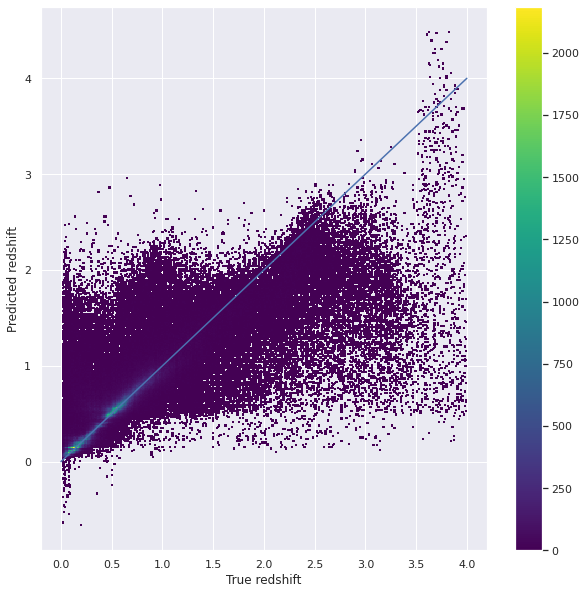

In [11]:
y_train_pred = xgb_model.predict(X_train)
y_train_pred = pd.Series(y_train_pred, index=y_train.index)
plot_predictions(y_train_pred, y_train)

In [12]:
metrics_agg = get_point_metrics(y_train_pred, y_train)
metrics_binned = get_point_metrics(y_train_pred, y_train, binned=True)
metrics_binned

,zspec_bin,count,L,bias_bw,bias_conv,scatter_bw,scatter_conv,outlier_bw,outlier_conv
0,"(0.0, 0.2]",119841,0.140192,0.018861,0.021328,0.039187,0.038860,0.136397,0.098314
1,"(0.2, 0.4]",99005,0.186655,-0.001228,0.005330,0.056112,0.045699,0.200798,0.165870
2,"(0.4, 0.6]",140758,0.100741,0.012020,0.012455,0.037856,0.032422,0.129918,0.058647
3,"(0.6, 0.8]",106500,0.112415,0.000934,0.002832,0.044666,0.039324,0.122291,0.065690
4,"(0.8, 1.0]",53895,0.158356,-0.007713,-0.004872,0.056225,0.048501,0.148437,0.110882
5,"(1.0, 1.2]",23522,0.249746,-0.033968,-0.031381,0.094831,0.073151,0.139614,0.185571
6,"(1.2, 1.4]",13328,0.291250,-0.040737,-0.039999,0.125592,0.101898,0.081483,0.241146
7,"(1.4, 1.6]",8491,0.332078,-0.073920,-0.066462,0.134919,0.120836,0.057826,0.305147
8,"(1.6, 1.8]",6637,0.338798,-0.086414,-0.077181,0.131432,0.114733,0.067199,0.320175
9,"(1.8, 2.0]",5854,0.416202,-0.126370,-0.120294,0.127540,0.112196,0.076187,0.404510


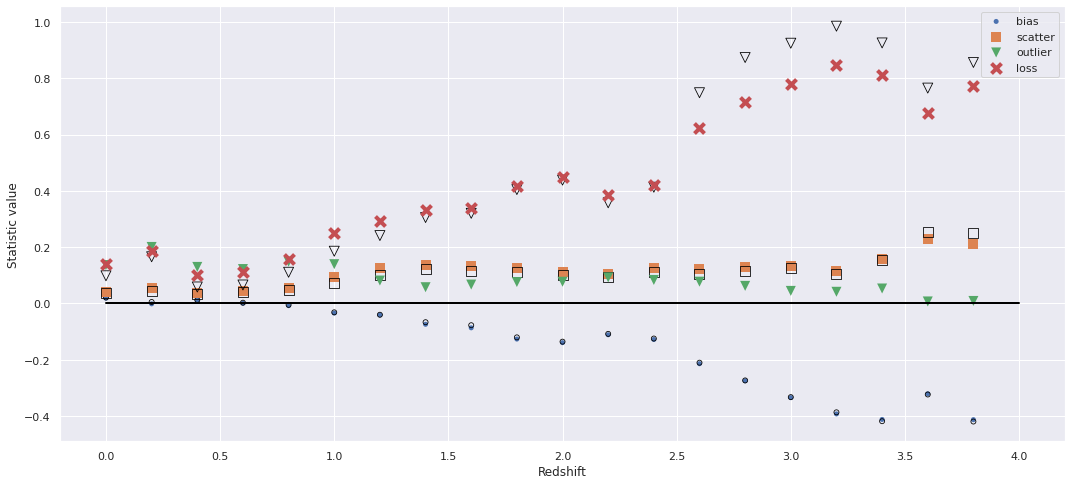

In [13]:
plot_point_metrics(metrics_binned)

## Evaluate test point estimates

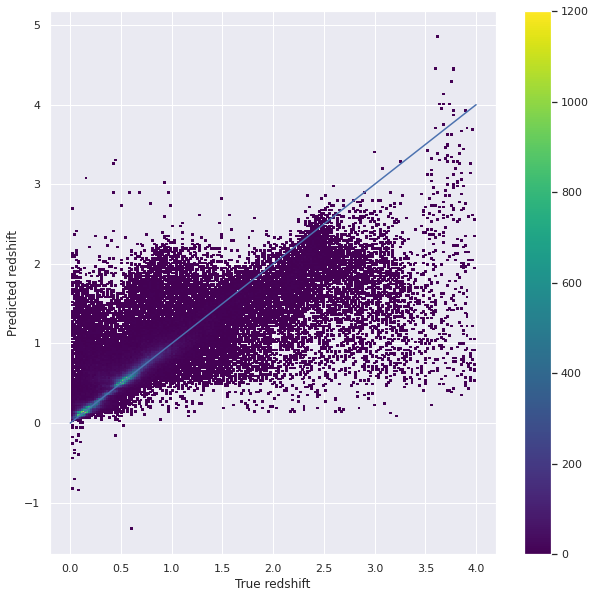

In [14]:
y_test_pred = xgb_model.predict(X_test)
y_test_pred = pd.Series(y_test_pred, index=y_test.index)
plot_predictions(y_test_pred, y_test)

In [15]:
metrics_agg = get_point_metrics(y_test_pred, y_test)
metrics_binned = get_point_metrics(y_test_pred, y_test, binned=True)
metrics_binned

,zspec_bin,count,L,bias_bw,bias_conv,scatter_bw,scatter_conv,outlier_bw,outlier_conv
0,"(0.0, 0.2]",29780,0.140948,0.018574,0.021103,0.038986,0.038754,0.137911,0.099530
1,"(0.2, 0.4]",24808,0.185441,-0.001294,0.005283,0.054723,0.044917,0.202273,0.164020
2,"(0.4, 0.6]",35090,0.101031,0.011572,0.012135,0.037361,0.032038,0.132915,0.061015
3,"(0.6, 0.8]",26749,0.115713,0.001547,0.003415,0.045454,0.040269,0.123033,0.068825
4,"(0.8, 1.0]",13565,0.160710,-0.007995,-0.005053,0.056581,0.049622,0.147807,0.113011
5,"(1.0, 1.2]",5935,0.257850,-0.033529,-0.030433,0.097787,0.075447,0.146757,0.194440
6,"(1.2, 1.4]",3323,0.300825,-0.039734,-0.040737,0.129382,0.105076,0.080951,0.245561
7,"(1.4, 1.6]",2178,0.341769,-0.075566,-0.067322,0.140430,0.127665,0.052801,0.313590
8,"(1.6, 1.8]",1750,0.352721,-0.093295,-0.082881,0.136444,0.122061,0.061143,0.341143
9,"(1.8, 2.0]",1391,0.438100,-0.138902,-0.131085,0.134495,0.124700,0.058950,0.432063


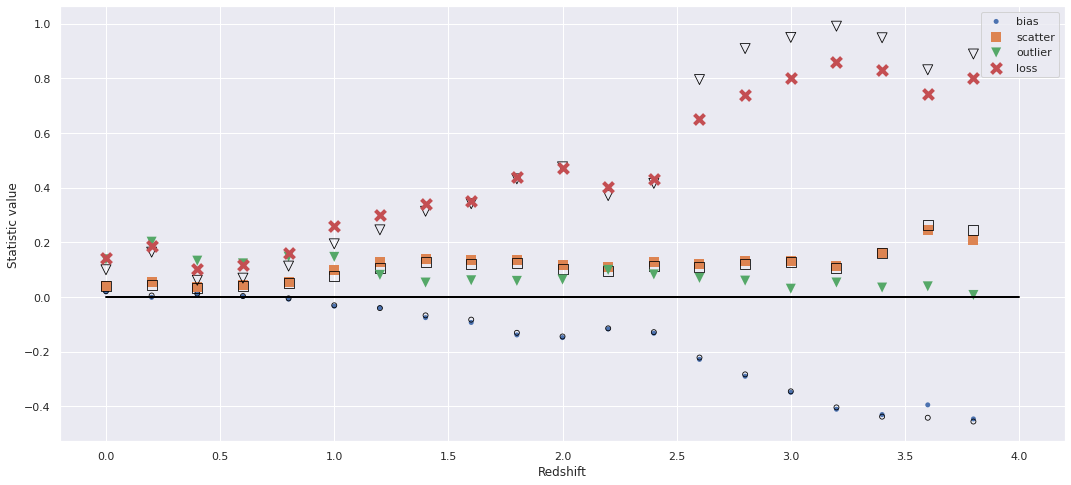

In [16]:
plot_point_metrics(metrics_binned)